<a href="https://colab.research.google.com/github/camiherrera667/Taller-electiva-2/blob/main/Simulaci%C3%B3n_Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problematica

Dirimplex S.A.S. es una empresa colombiana especializada en la comercialización y distribución de equipos para laboratorios de Ingeniería Civil, Pruebas Estructurales y de Materiales. En los últimos meses, ha experimentado un aumento progresivo en los costos asociados al alquiler de vehículos utilizados en su proceso de distribución. Este incremento se debe a varios factores, entre ellos, la escasez de vehículos disponibles.

La empresa tiene su sede en Bogotá y uno de sus principales destinos de entrega es la ciudad de Medellín. Los pedidos diarios hacia esta ciudad siguen una distribución aleatoria de Poisson, con una media de 25 pedidos por día, variando usualmente entre 15 y 35. Cada pedido tiene un peso promedio de 60 kg. Para realizar los despachos, Dirimplex cuenta con una flota propia de tres vehículos, cada uno con una capacidad de carga de 600 kg y un costo operativo de 826.575 por viaje. Debido a la duración del recorrido de ida y vuelta, cada vehículo requiere un periodo de receso, presentando cada tercer día un aumento de 5 horas en el tiempo de operación.
Cuando la demanda diaria excede la capacidad de los vehículos propios, la empresa debe recurrir al alquiler de vehículos de terceros para garantizar las entregas. Estos vehículos alquilados también cuentan con una capacidad de 600 kg, pero presentan un costo operativo más alto: 1.028.575 por viaje, pues incluye cargo fijo de $202.000 por servicio. La disponibilidad de estos vehículos está sujeta a la capacidad del proveedor externo, con un tiempo de espera de hasta 6 horas. Adicionalmente, si un pedido no es despachado dentro de un plazo máximo de 8 horas, se aplica una penalización del 0,5% sobre el valor del pedido.

Se ha identificado que, en comparación con otros destinos como Barranquilla y Cali, el despacho de pedidos hacia Medellín ha requerido con mayor frecuencia la tercerización de vehículos, debido a que la capacidad actual de los vehículos propios no es suficiente para cubrir la demanda diaria. Esta situación ha generado un aumento significativo en los costos operativos y como principal causal el alto volumen de penalizaciones.

Con el objetivo de reducir estos costos y mejorar la eficiencia en la distribución, se propone la adquisición de un nuevo vehículo propio. Esta medida permitiría aumentar la capacidad de transporte disponible y minimizar la necesidad de recurrir a vehículos tercerizados.

In [4]:
import pandas as pd

In [2]:
df =pd.read_excel("/content/Datos electiva 2.xlsx")

Datos cargados:
   TRIMESTRE  DIA  ALEATORIO 1  PEDIDOS DIARIOS  OCUPACION KG  \
0          1    1     0.400503               19          1140   
1          1    2     0.246368               33          1980   
2          1    3     0.182567               35          2100   
3          1    4     0.586725               15           900   
4          1    5     0.601940               15           900   

   CANTIDAD DE VEHICULOS TIPO DE VEHICULO  COSTO UTILIZACION  \
0                      2           PROPIO       1.653149e+06   
1                      3           PROPIO       2.479724e+06   
2                      4          TERCERO       4.114299e+06   
3                      2           PROPIO       1.653149e+06   
4                      2           PROPIO       1.653149e+06   

   TIEMPO DE OPERACIÓN HR  VALOR PEDIDO  PENALIZACION    COSTO TOTAL  
0                     2.7      204700.0         0.0000  1.653149e+06  
1                     2.7      272455.7         0.0000  2.479724e+

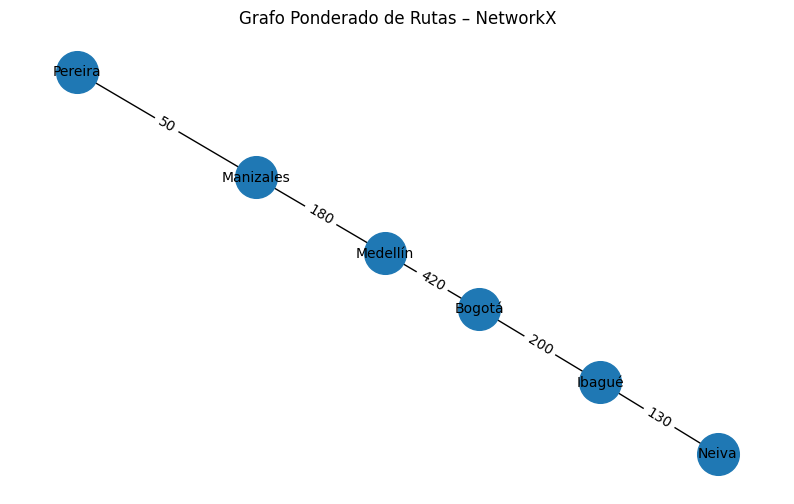


Ruta más corta calculada con NetworkX:
['Bogotá', 'Medellín']
Distancia total: 420


In [20]:
!pip install networkx

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

archivo = "/content/Datos electiva 2.xlsx"
df = pd.read_excel(archivo)

print("Datos cargados:")
print(df.head())

for origen, conexiones in grafo_ciudades.items():
    for destino, distancia in conexiones.items():
        G.add_edge(origen, destino, weight=distancia)

print("\nNodos del grafo:")
print(G.nodes())

print("\nAristas del grafo con pesos:")
print(G.edges(data=True))

# 4. Dibujar el grafo usando NetworkX

plt.figure(figsize=(10, 6))

pos = nx.spring_layout(G, seed=42)   # disposición visual agradable

# Dibujar nodos
nx.draw_networkx_nodes(G, pos, node_size=900)

# Dibujar bordes/aristas
nx.draw_networkx_edges(G, pos)

# Dibujar etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=10)

# Dibujar pesos
pesos = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=pesos)

plt.title("Grafo Ponderado de Rutas – NetworkX")
plt.axis("off")
plt.show()

# 5. Ejecutar Dijkstra con NetworkX

inicio = "Bogotá"
fin = "Medellín"

ruta_mas_corta = nx.shortest_path(G, source=inicio, target=fin, weight="weight")
distancia_total = nx.shortest_path_length(G, source=inicio, target=fin, weight="weight")

print("\nRuta más corta calculada con NetworkX:")
print(ruta_mas_corta)
print("Distancia total:", distancia_total)

In [15]:
df = pd.read_excel("/content/Datos electiva 2.xlsx")

print("Datos cargados:")
print(df.head())

print("\nGRAFO CONSTRUIDO AUTOMÁTICAMENTE (using predefined graph):")
for nodo in grafo:
    print(nodo, "->", grafo[nodo])


# Función DIJKSTRA

def dijkstra(grafo, inicio):
    # Distancias muy grandes al inicio
    distancias = {nodo: float("inf") for nodo in grafo}
    distancias[inicio] = 0

    # Para guardar el camino
    camino = {nodo: None for nodo in grafo}

    visitados = set()

    while len(visitados) < len(grafo):
        # Seleccionar el nodo con menor distancia NO visitado
        nodo_actual = None
        distancia_mas_corta = float("inf")

        for nodo in grafo:
            if nodo not in visitados and distancias[nodo] < distancia_mas_corta:
                distancia_mas_corta = distancias[nodo]
                nodo_actual = nodo

        if nodo_actual is None:
            break

        visitados.add(nodo_actual)


        if isinstance(grafo[nodo_actual], dict):
            for vecino, peso in grafo[nodo_actual].items():
                nueva_distancia = distancias[nodo_actual] + peso

                if nueva_distancia < distancias[vecino]:
                    distancias[vecino] = nueva_distancia
                    camino[vecino] = nodo_actual
        else:

            for vecino, peso in grafo[nodo_actual]:
                nueva_distancia = distancias[nodo_actual] + peso

                if nueva_distancia < distancias[vecino]:
                    distancias[vecino] = nueva_distancia
                    camino[vecino] = nodo_actual

    return distancias, camino



# Ejecutar Dijkstra: Bogotá -> Medellín

inicio = "Bogotá"
fin = "Medellín"

distancias, camino = dijkstra(grafo, inicio)

print("\nDISTANCIAS CALCULADAS DESDE:", inicio)
print(distancias)


# Reconstruir la ruta final hacia Medellín

ruta = []
nodo = fin

while nodo is not None:
    ruta.append(nodo)
    nodo = camino[nodo]

ruta = list(reversed(ruta))

print("\nRUTA MÁS CORTA:", ruta)
print("DISTANCIA TOTAL:", distancias[fin])

Datos cargados:
   TRIMESTRE  DIA  ALEATORIO 1  PEDIDOS DIARIOS  OCUPACION KG  \
0          1    1     0.400503               19          1140   
1          1    2     0.246368               33          1980   
2          1    3     0.182567               35          2100   
3          1    4     0.586725               15           900   
4          1    5     0.601940               15           900   

   CANTIDAD DE VEHICULOS TIPO DE VEHICULO  COSTO UTILIZACION  \
0                      2           PROPIO       1.653149e+06   
1                      3           PROPIO       2.479724e+06   
2                      4          TERCERO       4.114299e+06   
3                      2           PROPIO       1.653149e+06   
4                      2           PROPIO       1.653149e+06   

   TIEMPO DE OPERACIÓN HR  VALOR PEDIDO  PENALIZACION    COSTO TOTAL  
0                     2.7      204700.0         0.0000  1.653149e+06  
1                     2.7      272455.7         0.0000  2.479724e+

Datos cargados:
   TRIMESTRE  DIA  ALEATORIO 1  PEDIDOS DIARIOS  OCUPACION KG  \
0          1    1     0.400503               19          1140   
1          1    2     0.246368               33          1980   
2          1    3     0.182567               35          2100   
3          1    4     0.586725               15           900   
4          1    5     0.601940               15           900   

   CANTIDAD DE VEHICULOS TIPO DE VEHICULO  COSTO UTILIZACION  \
0                      2           PROPIO       1.653149e+06   
1                      3           PROPIO       2.479724e+06   
2                      4          TERCERO       4.114299e+06   
3                      2           PROPIO       1.653149e+06   
4                      2           PROPIO       1.653149e+06   

   TIEMPO DE OPERACIÓN HR  VALOR PEDIDO  PENALIZACION    COSTO TOTAL  
0                     2.7      204700.0         0.0000  1.653149e+06  
1                     2.7      272455.7         0.0000  2.479724e+

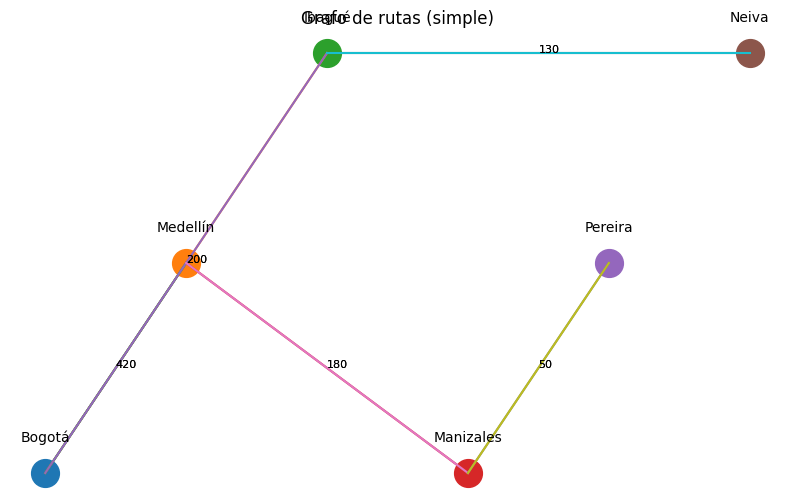


Simulación básica de demanda/capacidad:
   Día  Pedidos  Carga total (kg)  Faltante con 3 veh  Faltante con 4 veh
0    1       20              1200                   0                   0
1    2       35              2100                 300                   0
2    3       27              1620                   0                   0
3    4       20              1200                   0                   0
4    5       29              1740                   0                   0

Costo total en 30 días con 3 vehículos: 71691450.0
Costo total en 30 días con 4 vehículos: 71085450.0
Ahorro estimado: 606000.0


In [16]:
archivo = "/content/Datos electiva 2.xlsx"
df = pd.read_excel(archivo)

print("Datos cargados:")
print(df.head())

print("\nGrafo construido (using predefined graph):")
for nodo, conexiones in grafo.items():
    print(nodo, "->", conexiones)



# Funcion Dijkstra


def dijkstra(grafo, inicio):
    dist = {n: float("inf") for n in grafo}
    dist[inicio] = 0
    previo = {n: None for n in grafo}
    visitados = set()

    while len(visitados) < len(grafo):
        nodo_actual = None
        menor = float("inf")

        for nodo in grafo:
            if nodo not in visitados and dist[nodo] < menor:
                menor = dist[nodo]
                nodo_actual = nodo

        if nodo_actual is None:
            break

        visitados.add(nodo_actual)


        if isinstance(grafo[nodo_actual], dict):
            for vecino, peso in grafo[nodo_actual].items():
                nueva = dist[nodo_actual] + peso
                if nueva < dist[vecino]:
                    dist[vecino] = nueva
                    previo[vecino] = nodo_actual
        else:

            for vecino, peso in grafo[nodo_actual]:
                nueva = dist[nodo_actual] + peso
                if nueva < dist[vecino]:
                    dist[vecino] = nueva
                    previo[vecino] = nodo_actual

    return dist, previo


# Ejecutar Dijkstra Bogotá → Medellín
inicio = "Bogotá"
destino = "Medellín"

distancias, camino = dijkstra(grafo, inicio)

# Reconstruir ruta
ruta = []
n = destino
while n is not None:
    ruta.append(n)
    n = camino[n]
ruta = list(reversed(ruta))

print("\nRuta más corta:")
print(ruta)
print("Distancia total:", distancias[destino])



# Grafo (simple)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Posiciones simples tipo rejilla
pos = {}
for i, nodo in enumerate(grafo.keys()):
    pos[nodo] = (i, i % 3)

# Dibujar nodos
for nodo, (x, y) in pos.items():
    plt.scatter(x, y, s=400)
    plt.text(x, y+0.15, nodo, ha="center")

# Dibujar conexiones - adapted for dictionary of dictionaries
for o in grafo:
    for d, dist in grafo[o].items(): # Iterate over items for dict of dicts
        xo, yo = pos[o]
        xd, yd = pos[d]
        plt.plot([xo, xd], [yo, yd])
        plt.text((xo+xd)/2, (yo+yd)/2, str(dist), fontsize=8)

plt.title("Grafo de rutas (simple)")
plt.axis("off")
plt.show()


# Simulación simple de capacidad de vehículos


import random
import numpy as np

# Datos del problema
media_pedidos = 25            # Promedio
peso_promedio = 60            # kg por pedido
capacidad_vehiculo = 600      # kg
vehiculos_actuales = 3
vehiculos_nuevos = 4

# Simular 30 días
dias = 30
registro = []

for dia in range(dias):
    pedidos = np.random.poisson(media_pedidos)
    carga_total = pedidos * peso_promedio

    capacidad_3 = vehiculos_actuales * capacidad_vehiculo
    capacidad_4 = vehiculos_nuevos * capacidad_vehiculo

    necesitan_alquiler_3 = max(0, carga_total - capacidad_3)
    necesitan_alquiler_4 = max(0, carga_total - capacidad_4)

    registro.append([dia+1, pedidos, carga_total, necesitan_alquiler_3, necesitan_alquiler_4])

sim = pd.DataFrame(registro, columns=[
    "Día", "Pedidos", "Carga total (kg)",
    "Faltante con 3 veh", "Faltante con 4 veh"
])

print("\nSimulación básica de demanda/capacidad:")
print(sim.head())



# Estimación de costos (simple)


costo_propio = 826575
costo_alquilado = 1028575

sim["Viajes_propios_3"] = np.ceil((sim["Carga total (kg)"] - sim["Faltante con 3 veh"]) / 600)
sim["Viajes_alquilados_3"] = np.ceil(sim["Faltante con 3 veh"] / 600)

sim["Viajes_propios_4"] = np.ceil((sim["Carga total (kg)"] - sim["Faltante con 4 veh"]) / 600)
sim["Viajes_alquilados_4"] = np.ceil(sim["Faltante con 4 veh"] / 600)

sim["Costo_total_3"] = sim["Viajes_propios_3"] * costo_propio + sim["Viajes_alquilados_3"] * costo_alquilado
sim["Costo_total_4"] = sim["Viajes_propios_4"] * costo_propio + sim["Viajes_alquilados_4"] * costo_alquilado

ahorro = sim["Costo_total_3"].sum() - sim["Costo_total_4"].sum()

print("\nCosto total en 30 días con 3 vehículos:", sim["Costo_total_3"].sum())
print("Costo total en 30 días con 4 vehículos:", sim["Costo_total_4"].sum())
print("Ahorro estimado:", ahorro)